In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
trainer_size = 50
customer_size = 50
trainer_space = np.linspace(0, 2.5 * np.pi, T) 
customer_space = np.linspace(0, 2.5 * np.pi, T) 
trainer_sample = trainer_space[:T]
customer_sample = customer_space[:T]

In [75]:
trainer = np.sin(trainer_sample)
# trainer = [0 for i in x]
customer = np.sin(customer_sample * 1.2)
# customer[len(x)//2:] = 0
# customer = [1 for i in x]
customer = customer[:T]
sample_mean = np.mean(customer)
sample_mean

0.20732092194348745

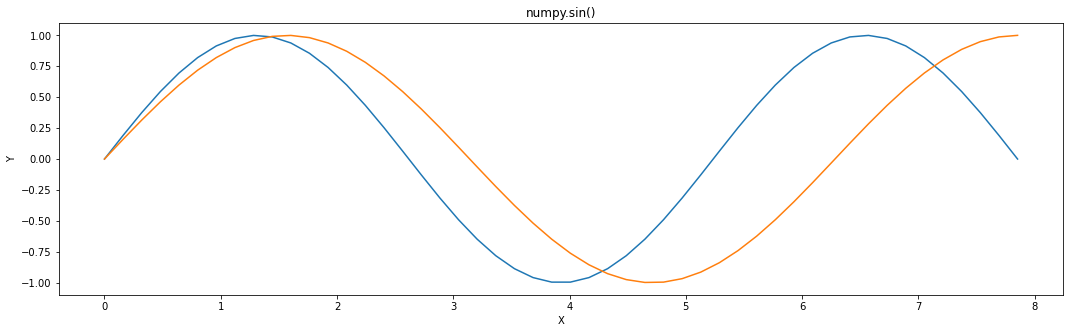

In [76]:
plt.figure(figsize=[18,5])
plt.plot(customer_sample, customer) 
plt.plot(trainer_sample,trainer) 
plt.title("numpy.sin()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 


In [101]:
from tslearn.metrics import dtw, dtw_path
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

optimal_path, dtw_score = dtw_path(trainer, customer, global_constraint='sakoe_chiba', sakoe_chiba_radius=100)
dtw_score

1.4935491925540192

In [102]:
data = to_time_series_dataset([trainer,customer])
data.shape

(2, 50, 1)

In [103]:
# model = TimeSeriesKMeans(n_clusters=2, metric="softdtw", max_iter=20)
# model.fit(data)

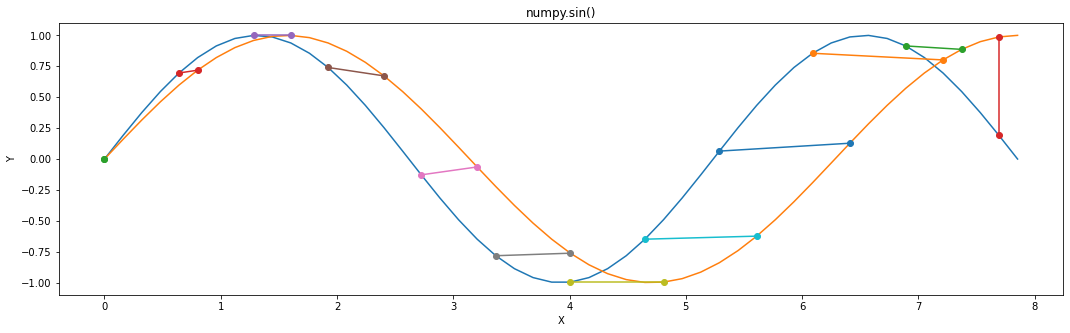

In [104]:
plt.figure(figsize=[18,5])
plt.plot(sample_size, customer) 
plt.plot(x, trainer) 
plt.title("numpy.sin()") 
plt.xlabel("X") 
plt.ylabel("Y") 
for i in range(0, len(optimal_path)):
    if i % 5 == 0:
        i_for_x = optimal_path[i][0]
        i_for_y = optimal_path[i][1]
        x_values = [x[i_for_x], sample_size[i_for_y]]
        y_values = [trainer[i_for_x], customer[i_for_y]]
        plt.plot(x_values, y_values, 'o-')
#     print(x_values, y_values)
plt.show() 